# Spatial Analysis I

## Merging spatial and aspatial data using Joins

![aspatial](images/aspatial.png)

Merging geodataframe (spatial data) and other aspatial data (commonly as dataframes) is exactly the same as merging two dataframes. The merge function is also avaialble with geodataframes. Let us look at an example. 

For this example we will combine the county boundary file with population data (from a csv file).

In [103]:
import geopandas as gpd
import pandas as pd

In [104]:
countyBoundaries = gpd.read_file('../../largedatasets/ohio_county_boundaries/ODOT_County_Boundaries.shp')
countyBoundaries

,OBJECTID,COUNTY_CD,COUNTY_SEA,ODOT_DISTR,FIPS_COUNT,POP_2010,POP_2000,POP_1990,STATE_PLAN,ELEVATION_,...,LONG_WEST_,AREA_SQMI,AREA_ID,created_us,created_da,last_edite,last_edi_1,SHAPE_STAr,SHAPE_STLe,geometry
0,1,HIG,HILLSBORO,9,39071,43589,40875,35728,S,1340,...,-83.873,557.74,53,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,2.407747e+09,213157.740992,"POLYGON ((-83.78330 39.26382, -83.78312 39.263..."
1,2,HOC,LOGAN,10,39073,29380,28241,25533,S,1220,...,-82.748,423.50,54,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,1.844277e+09,215451.632241,"POLYGON ((-82.49595 39.60265, -82.49505 39.612..."
2,3,HOL,MILLERSBURG,11,39075,42366,38943,32849,N,1380,...,-82.222,424.03,55,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,1.905310e+09,193045.013152,"POLYGON ((-81.87727 40.66713, -81.87564 40.667..."
3,4,HUR,NORWALK,3,39077,59626,59487,56240,N,1200,...,-82.843,495.96,56,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,2.267372e+09,197349.121399,"POLYGON ((-82.83547 41.14407, -82.83549 41.145..."
4,5,FRA,COLUMBUS,6,39049,1163414,1068978,961437,S,1130,...,-83.255,543.97,143,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,2.401407e+09,211754.151636,"POLYGON ((-83.24596 39.96574, -83.24595 39.965..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,VIN,MCARTHUR,10,39163,13435,12806,11098,S,1140,...,-82.763,414.92,28,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,1.794678e+09,212461.296202,"POLYGON ((-82.51710 39.36942, -82.51595 39.379..."
84,85,WAR,LEBANON,8,39165,212693,158383,113909,S,1060,...,-84.366,407.21,29,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,1.770899e+09,178414.982467,"POLYGON ((-83.98859 39.44441, -83.98941 39.435..."
85,86,HAS,CADIZ,11,39067,15864,15856,16085,N,1360,...,-81.341,411.07,51,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,1.829951e+09,181149.223466,"POLYGON ((-81.27273 40.36923, -81.27271 40.369..."
86,87,PIC,CIRCLEVILLE,6,39129,55698,52727,48255,S,1090,...,-83.265,506.13,77,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,2.214650e+09,215128.493147,"POLYGON ((-82.84304 39.56150, -82.84164 39.561..."


Now let us read in the population data

In [105]:
popData = pd.read_csv(r'../../largedatasets/pop_data/pop_data.csv')
popData_Ohio = popData[popData.Province_State=='Ohio']
popData_Ohio

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
1038,84000039,US,USA,840.0,39.0,NaN,Ohio,US,40.388800,-82.764900,"Ohio, US",11689100.0
1110,84080039,US,USA,840.0,80039.0,Out of OH,Ohio,US,NaN,NaN,"Out of OH, Ohio, US",NaN
1161,84090039,US,USA,840.0,90039.0,Unassigned,Ohio,US,NaN,NaN,"Unassigned, Ohio, US",NaN
3222,84039001,US,USA,840.0,39001.0,Adams,Ohio,US,38.845411,-83.471896,"Adams, Ohio, US",27698.0
3223,84039003,US,USA,840.0,39003.0,Allen,Ohio,US,40.772852,-84.108023,"Allen, Ohio, US",102351.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3305,84039167,US,USA,840.0,39167.0,Washington,Ohio,US,39.456906,-81.491214,"Washington, Ohio, US",59911.0
3306,84039169,US,USA,840.0,39169.0,Wayne,Ohio,US,40.829259,-81.888448,"Wayne, Ohio, US",115710.0
3307,84039171,US,USA,840.0,39171.0,Williams,Ohio,US,41.560520,-84.584296,"Williams, Ohio, US",36692.0
3308,84039173,US,USA,840.0,39173.0,Wood,Ohio,US,41.362248,-83.622851,"Wood, Ohio, US",130817.0


We want the fips column to be string as it is currently a number

In [106]:
popData_Ohio.dtypes

UID                 int64
iso2               object
iso3               object
code3             float64
FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Lat               float64
Long_             float64
Combined_Key       object
Population        float64
dtype: object

In [107]:
popData_Ohio.FIPS = popData_Ohio.FIPS.astype(int).astype(str)

C:\Users\jxa421\AppData\Local\Temp\ipykernel_21008\951814929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popData_Ohio.FIPS = popData_Ohio.FIPS.astype(int).astype(str)


In [108]:
popData_Ohio.dtypes

UID                 int64
iso2               object
iso3               object
code3             float64
FIPS               object
Admin2             object
Province_State     object
Country_Region     object
Lat               float64
Long_             float64
Combined_Key       object
Population        float64
dtype: object

In [109]:
countyBoundaries.dtypes

OBJECTID         int64
COUNTY_CD       object
COUNTY_SEA      object
ODOT_DISTR       int64
FIPS_COUNT      object
POP_2010         int64
POP_2000         int64
POP_1990         int64
STATE_PLAN      object
ELEVATION_       int64
ELEVATION1       int64
LAT_NORTH_     float64
LAT_SOUTH_     float64
LONG_EAST_     float64
LONG_WEST_     float64
AREA_SQMI      float64
AREA_ID          int64
created_us      object
created_da      object
last_edite      object
last_edi_1      object
SHAPE_STAr     float64
SHAPE_STLe     float64
geometry      geometry
dtype: object

Now merge the countyboundaries with the population data

In [110]:
countyBoundariesWithPopulation = countyBoundaries.merge(popData_Ohio,left_on='FIPS_COUNT',right_on='FIPS')

In [111]:
countyBoundariesWithPopulation

,OBJECTID,COUNTY_CD,COUNTY_SEA,ODOT_DISTR,FIPS_COUNT,POP_2010,POP_2000,POP_1990,STATE_PLAN,ELEVATION_,...,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,1,HIG,HILLSBORO,9,39071,43589,40875,35728,S,1340,...,USA,840.0,39071,Highland,Ohio,US,39.183926,-83.603315,"Highland, Ohio, US",43161.0
1,2,HOC,LOGAN,10,39073,29380,28241,25533,S,1220,...,USA,840.0,39073,Hocking,Ohio,US,39.495379,-82.479914,"Hocking, Ohio, US",28264.0
2,3,HOL,MILLERSBURG,11,39075,42366,38943,32849,N,1380,...,USA,840.0,39075,Holmes,Ohio,US,40.561637,-81.926357,"Holmes, Ohio, US",43960.0
3,4,HUR,NORWALK,3,39077,59626,59487,56240,N,1200,...,USA,840.0,39077,Huron,Ohio,US,41.146512,-82.598680,"Huron, Ohio, US",58266.0
4,5,FRA,COLUMBUS,6,39049,1163414,1068978,961437,S,1130,...,USA,840.0,39049,Franklin,Ohio,US,39.969958,-83.011158,"Franklin, Ohio, US",1316756.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,VIN,MCARTHUR,10,39163,13435,12806,11098,S,1140,...,USA,840.0,39163,Vinton,Ohio,US,39.252090,-82.483144,"Vinton, Ohio, US",13085.0
84,85,WAR,LEBANON,8,39165,212693,158383,113909,S,1060,...,USA,840.0,39165,Warren,Ohio,US,39.425820,-84.165575,"Warren, Ohio, US",234602.0
85,86,HAS,CADIZ,11,39067,15864,15856,16085,N,1360,...,USA,840.0,39067,Harrison,Ohio,US,40.293805,-81.090685,"Harrison, Ohio, US",15040.0
86,87,PIC,CIRCLEVILLE,6,39129,55698,52727,48255,S,1090,...,USA,840.0,39129,Pickaway,Ohio,US,39.641704,-83.024339,"Pickaway, Ohio, US",58457.0


Now just for fun we can visualize this as a choropleth map ( we will learn about mapping in the upcoming sessions)

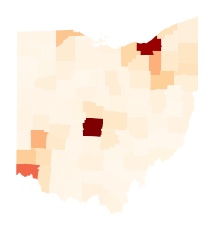

In [112]:
countyBoundariesWithPopulation.plot(column='Population',cmap='OrRd').set_axis_off();

## Single Layer Analysis

Single layer analyses are those that are undertaken on an individual geospatial dataset. Let's look into few single layer analysis techniques.

## Buffering

**Buffering** is the process of **creating an output polygon layer** containing a zone (or zones) of a **specified width around an input point, line, or polygon feature**. Buffers are particularly suited for determining the **area of influence around features of interest**.

![buffer](images/buffer.png)

Let us see a simple example. 

In [113]:
hospitals = gpd.read_file('../../largedatasets/Ohio_hospitals/Ohio_hospitals.shp')

In [114]:
clevelandLargeHospitals = hospitals[(hospitals.CITY=='CLEVELAND')&(hospitals.BEDS>=1000)&(hospitals.BEDS>=1000)].drop_duplicates(subset=['ADDRESS'])
clevelandLargeHospitals

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,TELEPHONE,TYPE,STATUS,POPULATION,...,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,geometry
15,1126,1744106,UNIVERSITY HOSPITALS OF CLEVELAND,11100 EUCLID AVENUE,CLEVELAND,OH,(216) 844-1000,GENERAL ACUTE CARE,OPEN,1032,...,http://www.uhhospitals.org/cleveland,1142,NOT AVAILABLE,39,NON-PROFIT,-999,1032,LEVEL I,Y,POINT (-81.60510 41.50614)
16,1127,17044195,CLEVELAND CLINIC FOUNDATION HOSPITAL,9500 EUCLID AVENUE,CLEVELAND,OH,(216) 444-2200,GENERAL ACUTE CARE,OPEN,1268,...,http://www.clevelandclinic.org,1151,NOT AVAILABLE,39,NON-PROFIT,-999,1268,NOT AVAILABLE,Y,POINT (-81.62079 41.50275)


<AxesSubplot:>

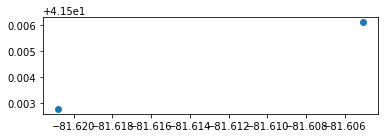

In [115]:
clevelandLargeHospitals.plot()

In [116]:
clevelandLargeHospitals.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

As you can see from the crs attribute, the data is not projected. For **buffering it is always advisable to have the spatial data projected in meter (or feet)**. So if your data is with in Ohio a good choice of projection will be UTM 17N with EPSG 26917, and if you just want to use a projection that works decently for many of the cases then you can use EPSG 3857 (psuedo mercator). 

So let us re-project our data

In [117]:
clevelandLargeHospitalsReProject = clevelandLargeHospitals.to_crs('EPSG:26917')
clevelandLargeHospitalsReProject

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,TELEPHONE,TYPE,STATUS,POPULATION,...,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,geometry
15,1126,1744106,UNIVERSITY HOSPITALS OF CLEVELAND,11100 EUCLID AVENUE,CLEVELAND,OH,(216) 844-1000,GENERAL ACUTE CARE,OPEN,1032,...,http://www.uhhospitals.org/cleveland,1142,NOT AVAILABLE,39,NON-PROFIT,-999,1032,LEVEL I,Y,POINT (449501.684 4595123.133)
16,1127,17044195,CLEVELAND CLINIC FOUNDATION HOSPITAL,9500 EUCLID AVENUE,CLEVELAND,OH,(216) 444-2200,GENERAL ACUTE CARE,OPEN,1268,...,http://www.clevelandclinic.org,1151,NOT AVAILABLE,39,NON-PROFIT,-999,1268,NOT AVAILABLE,Y,POINT (448188.957 4594755.939)


In [118]:
clevelandLargeHospitalsReProject.crs

<Derived Projected CRS: EPSG:26917>
Name: NAD83 / UTM zone 17N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 84°W and 78°W - onshore and offshore. Canada - Nunavut; Ontario; Quebec. United States (USA) - Florida; Georgia; Kentucky; Maryland; Michigan; New York; North Carolina; Ohio; Pennsylvania; South Carolina; Tennessee; Virginia; West Virginia.
- bounds: (-84.0, 23.81, -78.0, 84.0)
Coordinate Operation:
- name: UTM zone 17N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Now lets apply a buffer of 500 meters.

In [119]:
clevelandLargeHospitalsBuffer = clevelandLargeHospitalsReProject.buffer(500)
clevelandLargeHospitalsBuffer

15    POLYGON ((450001.684 4595123.133, 449999.276 4...
16    POLYGON ((448688.957 4594755.939, 448686.549 4...
dtype: geometry

So the output is a geoseries (which is like a series in pandas). Now if we want to create a new clevelandLargeHospitals datasets with these buffer geometries as the geodataframe geometry you can do like this

In [120]:
clevelandLargeHospitalsWithoutGeometry = clevelandLargeHospitalsReProject.drop(columns='geometry')

In [121]:
clevelandLargeHospitalsWithoutGeometry

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,TELEPHONE,TYPE,STATUS,POPULATION,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
15,1126,1744106,UNIVERSITY HOSPITALS OF CLEVELAND,11100 EUCLID AVENUE,CLEVELAND,OH,(216) 844-1000,GENERAL ACUTE CARE,OPEN,1032,...,2014/03/12 00:00:00.000,http://www.uhhospitals.org/cleveland,1142,NOT AVAILABLE,39,NON-PROFIT,-999,1032,LEVEL I,Y
16,1127,17044195,CLEVELAND CLINIC FOUNDATION HOSPITAL,9500 EUCLID AVENUE,CLEVELAND,OH,(216) 444-2200,GENERAL ACUTE CARE,OPEN,1268,...,2014/02/10 00:00:00.000,http://www.clevelandclinic.org,1151,NOT AVAILABLE,39,NON-PROFIT,-999,1268,NOT AVAILABLE,Y


In [122]:
clevelandLargeHospitalsBufferData = gpd.GeoDataFrame(clevelandLargeHospitalsWithoutGeometry,geometry=clevelandLargeHospitalsBuffer,crs=clevelandLargeHospitalsBuffer.crs)
clevelandLargeHospitalsBufferData

,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,TELEPHONE,TYPE,STATUS,POPULATION,...,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,geometry
15,1126,1744106,UNIVERSITY HOSPITALS OF CLEVELAND,11100 EUCLID AVENUE,CLEVELAND,OH,(216) 844-1000,GENERAL ACUTE CARE,OPEN,1032,...,http://www.uhhospitals.org/cleveland,1142,NOT AVAILABLE,39,NON-PROFIT,-999,1032,LEVEL I,Y,"POLYGON ((450001.684 4595123.133, 449999.276 4..."
16,1127,17044195,CLEVELAND CLINIC FOUNDATION HOSPITAL,9500 EUCLID AVENUE,CLEVELAND,OH,(216) 444-2200,GENERAL ACUTE CARE,OPEN,1268,...,http://www.clevelandclinic.org,1151,NOT AVAILABLE,39,NON-PROFIT,-999,1268,NOT AVAILABLE,Y,"POLYGON ((448688.957 4594755.939, 448686.549 4..."


<AxesSubplot:>

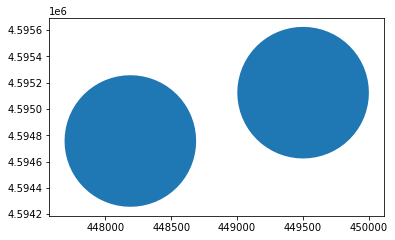

In [123]:
clevelandLargeHospitalsBufferData.plot()

Buffering is not limited to points. Let's add a 10 mile buffer around Cuyahoga County

In [124]:
countyBoundaries = gpd.read_file('../../largedatasets/ohio_county_boundaries/ODOT_County_Boundaries.shp')
cuyCounty = countyBoundaries[countyBoundaries.COUNTY_CD=='CUY']
cuyCounty

,OBJECTID,COUNTY_CD,COUNTY_SEA,ODOT_DISTR,FIPS_COUNT,POP_2010,POP_2000,POP_1990,STATE_PLAN,ELEVATION_,...,LONG_WEST_,AREA_SQMI,AREA_ID,created_us,created_da,last_edite,last_edi_1,SHAPE_STAr,SHAPE_STLe,geometry
73,74,CUY,CLEVELAND,12,39035,1280122,1393978,1412140,N,1280,...,-81.972,459.01,34,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,2.116231e+09,244073.200371,"POLYGON ((-81.39143 41.44521, -81.39076 41.445..."


<AxesSubplot:>

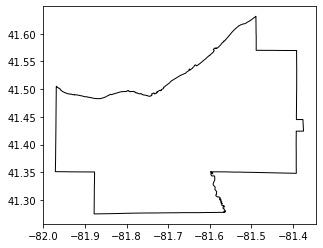

In [125]:
cuyCounty.plot(facecolor="none")

In [126]:
cuyCounty.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Let us re-project our data (since its ohio we are going to use EPSG:26917)

In [127]:
cuyCountyReproj = cuyCounty.to_crs('EPSG:26917')

In [128]:
cuyCountyBuffer = cuyCountyReproj.buffer(10*1609.34)

In [129]:
cuyCountyBuffer = cuyCountyBuffer.to_crs(cuyCounty.crs)

<AxesSubplot:>

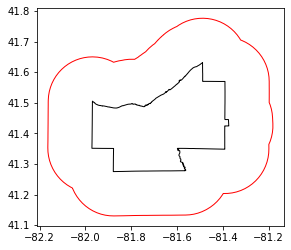

In [130]:
ax = cuyCountyBuffer.plot(facecolor="none",edgecolor="red")
cuyCounty.plot(facecolor="none",ax=ax)

## Centroid

Centroid returns the centre point of all the geometries. Lets extract out all the centroids of counties from Ohio

In [131]:
countyBoundaries = gpd.read_file('../../largedatasets/ohio_county_boundaries/ODOT_County_Boundaries.shp')

In [132]:
centroids = countyBoundaries.centroid

C:\Users\jxa421\AppData\Local\Temp\ipykernel_21008\1805727800.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = countyBoundaries.centroid


<AxesSubplot:>

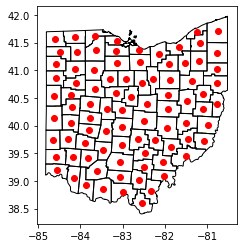

In [133]:
ax = countyBoundaries.plot(facecolor="none")
centroids.plot(marker='o',color='red',ax=ax)